# Individual Plot

<Figure size 1200x800 with 0 Axes>

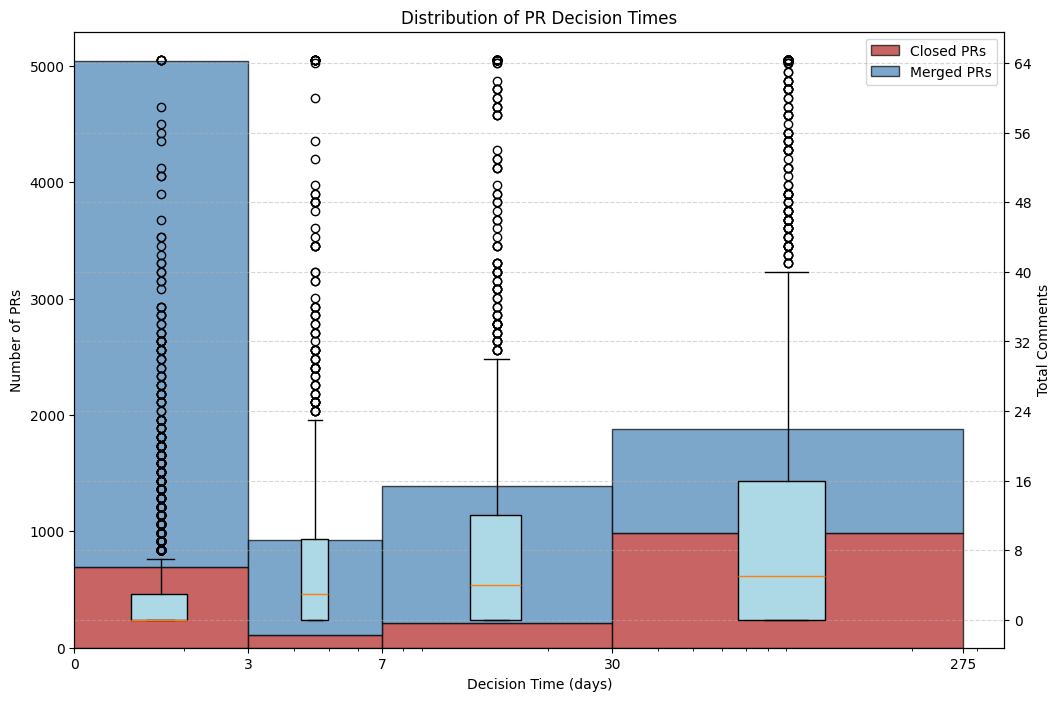

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

SECONDARY_CHARACTERISTIC = 'Total Comments'   # replace with 'Files Changed', 'Total Comments', 'LOC Changed' etc

df = pd.read_csv("../data/pull_requests_filtered.csv")

# Separate merged and closed PRs
merged_prs = df[df['State'] == 'merged']
closed_prs = df[df['State'] == 'closed']

merged_decision_times = merged_prs['Decision Time']
closed_decision_times = closed_prs['Decision Time']

# For the secondary characteristic, we'll keep using all PRs
decision_times = df['Decision Time']
secondary_characteristic = df[SECONDARY_CHARACTERISTIC]

bins = [0, 3, 7, 30, np.percentile(df['Decision Time'], 98)]

bin_indices = np.digitize(decision_times, bins)  # assign each PR to its bin index

secondary_characteristic_by_bin = [
    secondary_characteristic[bin_indices == i]
    for i in range(1, len(bins))
]
capped_secondary_characteristic_by_bin = [
    np.clip(bin_data, None, np.percentile(secondary_characteristic, 98))    # stop outliers making axes huge by taking 98th percentile cutoff
    for bin_data in secondary_characteristic_by_bin
]

plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))

hist_closed, bin_edges, _ = ax.hist(
    closed_decision_times, bins=bins, edgecolor='black', alpha=0.7, 
    label='Closed PRs', align='mid', color='#B22222'  # Firebrick
)

hist_merged, _, _ = ax.hist(
    merged_decision_times, bins=bins, edgecolor='black', alpha=0.7,
    label='Merged PRs', align='mid', color='#4682B4',  # Steel Blue
    bottom=hist_closed  # Stack on top of closed PRs
)

plt.xscale('log')

# Create secondary y-axis for the box plots
ax2 = ax.twinx()
ax2.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

log_bins = np.log10(bins[1:])
log_bins = np.insert(log_bins, 0, [0])

# Add box plots for each bin
bin_centers = [10 ** (((log_bins[i] + log_bins[i + 1])) / 2) for i in range(len(log_bins) - 1)]  # center positions for box plots
for i, secondary_characteristic_data in enumerate(capped_secondary_characteristic_by_bin):
    ax2.boxplot(
        secondary_characteristic_data,
        positions=[bin_centers[i]],  # place the box plot at the bin center
        widths=(bins[i + 1] - bins[i]) * 0.2,  # adjust width to match bin size
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
    )

ax.set_xticks([1] + bins[1:], [str(int(b)) for b in bins])      # log scale, so use 1 as first value as log(1) = 0 for first tick

plt.title('Distribution of PR Decision Times')
ax.set_xlabel('Decision Time (days)')
ax.set_ylabel('Number of PRs')
ax2.set_ylabel(SECONDARY_CHARACTERISTIC)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Add legend
ax.legend(loc='upper right')

# plt.savefig(f'../plot-images/decision_time_with_loc_changed.png')
plt.show()

# Combined Plot

  Decision time 0-3 days: 3.00
  Decision time 3-7 days: 4.00
  Decision time 7-30 days: 4.00
  Decision time 30+ days: 5.00
  Decision time 0-3 days: 50.00
  Decision time 3-7 days: 118.00
  Decision time 7-30 days: 143.00
  Decision time 30+ days: 157.00
  Decision time 0-3 days: 0.00
  Decision time 3-7 days: 3.00
  Decision time 7-30 days: 4.00
  Decision time 30+ days: 5.00


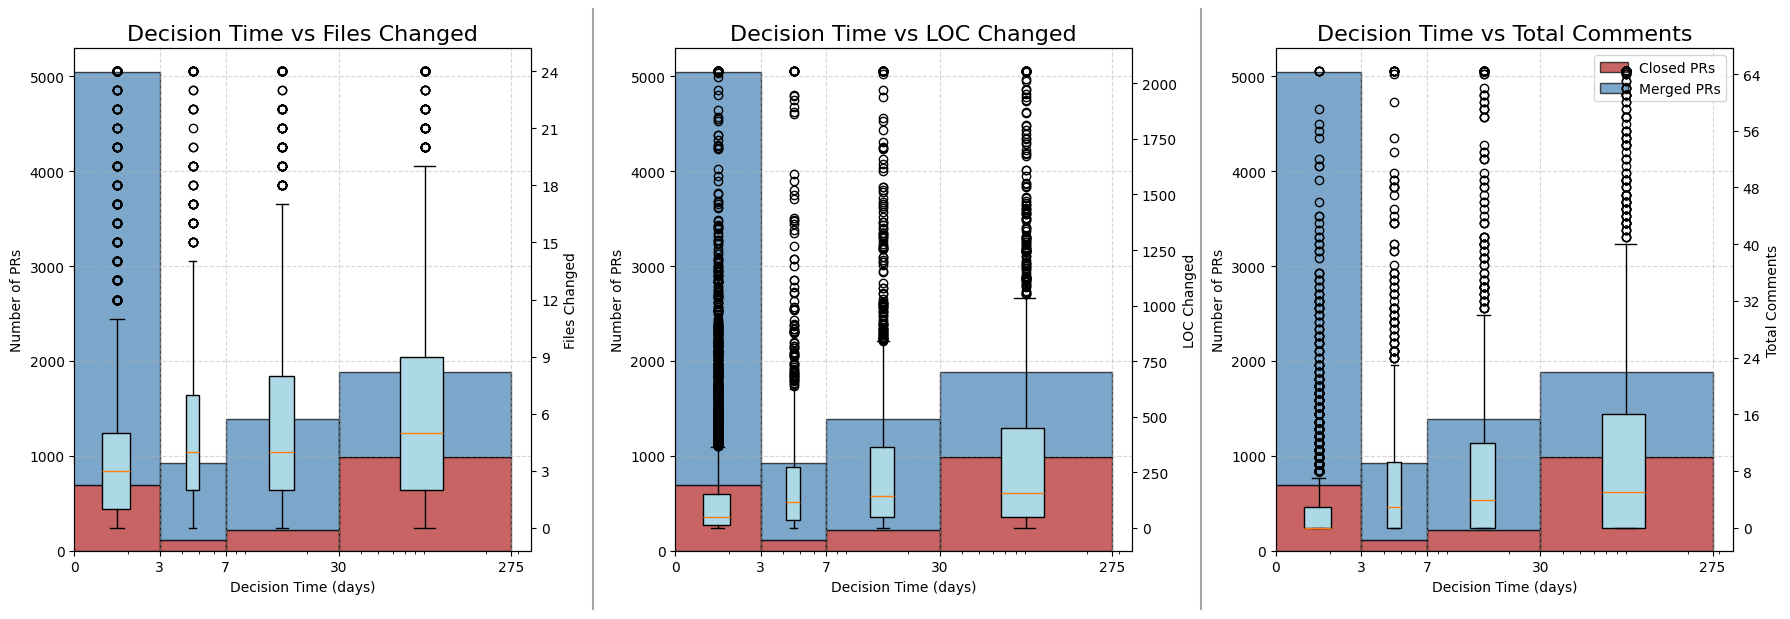

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

df = pd.read_csv("../data/pull_requests_filtered.csv")

# Separate merged and closed PRs
merged_prs = df[df['State'] == 'merged']
closed_prs = df[df['State'] == 'closed']

merged_decision_times = merged_prs['Decision Time']
closed_decision_times = closed_prs['Decision Time']

# Define secondary characteristics to compare
secondary_characteristics = ['Files Changed', 'LOC Changed', 'Total Comments']

# Define bins for decision time
bins = [0, 3, 7, 30, np.percentile(df['Decision Time'], 98)]
bin_indices = np.digitize(df['Decision Time'], bins)  # assign each PR to its bin index

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)  # Create 3 subplots

for i, characteristic in enumerate(secondary_characteristics):
    ax = axes[i]
    
    secondary_characteristic = df[characteristic]
    secondary_characteristic_by_bin = [
        secondary_characteristic[bin_indices == j]
        for j in range(1, len(bins))
    ]
    capped_secondary_characteristic_by_bin = [
        np.clip(bin_data, None, np.percentile(secondary_characteristic, 98))
        for bin_data in secondary_characteristic_by_bin
    ]

    # Histogram
    hist_closed, bin_edges, _ = ax.hist(
        closed_decision_times, bins=bins, edgecolor='black', alpha=0.7,
        label='Closed PRs', align='mid', color='#B22222'
    )
    hist_merged, _, _ = ax.hist(
        merged_decision_times, bins=bins, edgecolor='black', alpha=0.7,
        label='Merged PRs', align='mid', color='#4682B4',
        bottom=hist_closed  # Stack on top of closed PRs
    )

    ax.set_xscale('log')
    
    # Secondary y-axis for box plots
    ax2 = ax.twinx()
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    log_bins = np.log10(bins[1:])
    log_bins = np.insert(log_bins, 0, [0])
    
    bin_centers = [10 ** (((log_bins[j] + log_bins[j + 1])) / 2) for j in range(len(log_bins) - 1)]
    
    for j, secondary_characteristic_data in enumerate(capped_secondary_characteristic_by_bin):
        ax2.boxplot(
            secondary_characteristic_data,
            positions=[bin_centers[j]],
            widths=(bins[j + 1] - bins[j]) * 0.2,
            vert=True,
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
        )

    for j, secondary_characteristic_data in enumerate(capped_secondary_characteristic_by_bin):
        median_value = np.median(secondary_characteristic_data)
        bin_range = f"{bins[j]}-{bins[j+1]}" if j < len(bins)-2 else f"{bins[j]}+"

    ax.set_xticks([1] + bins[1:], [str(int(b)) for b in bins])
    ax.set_xlabel('Decision Time (days)')
    ax.set_ylabel('Number of PRs')
    ax2.set_ylabel(characteristic)
    ax.grid(visible=True, linestyle='--', alpha=0.5)
    
    ax.set_title(f'Decision Time vs {characteristic}', fontsize=16)

fig.add_artist(plt.Line2D([0.332, 0.332], [-0.00, 1.00], 
                         transform=fig.transFigure, 
                         color='gray', 
                         linestyle='solid', 
                         linewidth=1.5, 
                         alpha=0.7))

fig.add_artist(plt.Line2D([0.67, 0.67], [-0.00, 1.00], 
                         transform=fig.transFigure, 
                         color='gray', 
                         linestyle='solid', 
                         linewidth=1.5, 
                         alpha=0.7))

# Add legend to the last plot
axes[-1].legend(loc='upper right')

plt.tight_layout()
# plt.savefig('../plot-images/characteristics_decision_time.png')
plt.show()